## hw1pr1: <i>Files!</i>
+ walking through folders and files  (500 files - or many more!)
+ analyzing, counting, inquiring, and <i>insight-producing</i> as we go!  

In [13]:
# Where are we?
%pwd


'/Users/annapark/Desktop/HMC CS35/starting_notebooks'

In [14]:
'/Users/annapark/Desktop/HMC CS35/starting_notebooks'

'/Users/annapark/Desktop/HMC CS35/starting_notebooks'

By the way, when I run the above cell on my desktop machine (Mac), the response is

``'/Users/zacharydodds/Desktop/cs35/week1/starting_notebooks'``

on a Windows laptop, the path uses a different separator. Mine is

``'c:\\Users\\dodds\\OneDrive\\Desktop\\cs35\\week1\\starting_notebooks'``

Your results will almost certainly differ.

In fact, if they *don't* differ ... I'm _very_ interested! 🤔 🦔

In [15]:
# what's here?
%ls

files_challenge/          hw1pr1.ipynb              intro_first_ss_small.png
hw1pr0.ipynb              intro_first/              intro_second/


In [16]:
# to move around:  cd stands for "change directory" (a directory is a folder)
#    %cd intro_first    would move into the intro_first folder
#    %cd .. moves "up" to the containing directory
#    %cd .  doesn't move at all:  .  represents the current directory    

# For now, let's not move anywhere
%cd .

/Users/annapark/Desktop/HMC CS35/starting_notebooks


In 2024, my Mac setup succeeds with a ``UserWarning`` that tells me to install the ``pickleshare`` library.

I refuse based on snack-sharing principles!

One can only share freely, not under admonishment/warning!

(If this happens to you - let me know and we'll fix it...)

In [18]:
# we will use a few file-handling "system" libraries. 
# These are built-in to python, so nothing to install - just to import:
import os
import os.path

On first glance, it seems we can't open the file ``nottrue.ipynb`` ...

It's in the folder ``intro_first`` -- see if you can open it ...

In [6]:
#
# In fact, we can read it - it's just not a .ipynb file!
#
# Try it here, for your system:

print("+++ Contents of the file nottrue.ipynb: +++\n")

# Mac:    !cat  <filepath>  using forward slashes
#
# !cat ./intro_first/nottrue.ipynb       

# Windows:  type <filepath>  using backslashes
#
# !type .\\intro_first\\nottrue.ipynb     
# 

  

+++ Contents of the file nottrue.ipynb: +++



We *could* use the command-line ``cat`` or ``type`` one file at a time ...

But, what if we have to walk _500 files_ ?!  <font size="-2">(Alas, this joke stays around for at least this whole week!)</font>

  + Then, we need a function - and script - to access its contents. 
  + We started this last week, let's revisit it again here:

In [5]:
#
# function to return the contents of a file (as one-big-string)
#

def GET_STRING_FROM_FILE(filename_as_string):
    """ return all of the contents from the file, filename
        will error if the file is not present, then return the empty string ''
    """
    try:
        # the encoding below is a common default, but not universal...
        file_object = open(filename_as_string, "r", encoding='utf-8')    # open! (Other encodings: 'latin-1', 'utf-16', 'utf-32') 
        file_data = file_object.read()                                   # and get all its contents
        file_object.close()                                              # close the file (optional)
        #print(DATA)                                                     # if we want to see it
        return file_data                                                 # definitely want to return it!
    except FileNotFoundError:                             # it wasn't there
        print(f"file not found: {filename_as_string}")    # print error
        return ''                                         # return empty string ''
    except UnicodeDecodeError:
        print(f"decoding error: {filename_as_string}")    # encoding/decoding error  
        return ''                                         # return empty string ''


full_file_path = "./intro_first/nottrue.ipynb"
file_contents = GET_STRING_FROM_FILE(full_file_path)      # reminder: file_contents = file_data from above

# Let's print only some of this potentially large string, adapting as needed:
print("file_contents:\n\n", file_contents[0:42])          # let's then increase the 42...

file_contents:

 Hi, everyone in cs35!

As you're seeing, t


Notice that, in Python, the Mac/forwardslash/style paths work, _even on Windows_

In [6]:
####  Let's try one of the other files!  (or a non-existent file!)

full_file_path = "./intro_first/cs/file35.txt"    # how about the others?!
file_contents = GET_STRING_FROM_FILE(full_file_path)     
print("file_contents:\n\n", file_contents[0:42])

file_contents:

 CS for Insight


#### But, we have 500 files...

Let's write <font color="DodgerBlue">_steppingstone_ functions</font> to make sense of our 500 files...

Let's start by reminding ourselves we can write a function that returns.

We'll call this Version 0:

In [10]:
#
# Steppingstone, Version 0: does Python work?
#

import os
import os.path

def file_walker(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then... explores any questions we might want :)

        call, for example, with    file_walker("./intro_first") 
    """
    return 42  # just to check that it's working (v0)    

#
# when discovering, keep your data close (and your functions closer!)
#
if True:
    """ overall script that runs examples """
    print(f"[[ Start! ]]\n")     # sign on

    path = "./intro_first"       # Remember: . means the current directory
    result = file_walker(path)   # Run!

    print(f"result = {result}")  # Yay for f-strings!

    print("\n[[ Fin. ]]")        # sign off


[[ Start! ]]

result = 42

[[ Fin. ]]


<hr>

#### Introducing ``os.walk``

The function ``os.walk(path)`` will walk _any number_ of files...

Before we write a function, let's try  ``os.walk`` immediately:

In [11]:
# os.walk returns the structure of a folder (directory)

# Here, we "walk" the intro_examples subfolder:
all_files = os.walk("./intro_first")

all_files     # oops! it's a "generator object"

<generator object walk at 0x128380040>

In [8]:
import os
L = list( os.walk( "./intro_first" ) )  
print(f"{len(L) = }")
print(f"{L = }")

len(L) = 5
L = [('./intro_first', ['cs', 'sci'], ['.DS_Store', 'nottrue.ipynb']), ('./intro_first/cs', [], ['.DS_Store', 'file35.txt', 'file181y.txt']), ('./intro_first/sci', ['50', '10'], ['.DS_Store']), ('./intro_first/sci/50', [], ['IDE.txt']), ('./intro_first/sci/10', [], ['IDE.txt'])]


Here's a line-wrapped version of the list ``L``
  + Below it, is a picture of the folder-and-file structure!  
  + Our goal: mind-mapping the two representations!!

``L = [('./intro_first', ['cs', 'sci'], ['.DS_Store', 'nottrue.ipynb']), 
('./intro_first/cs', [], ['.DS_Store', 'file35.txt', 'file181y.txt']), 
('./intro_first/sci', ['50', '10'], ['.DS_Store']), ('./intro_first/sci/50', [], ['IDE.txt']), ('./intro_first/sci/10', [], ['IDE.txt'])]``

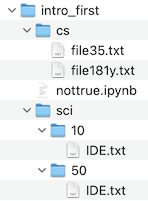

In [9]:
from IPython import display
#
# this is in the hw1pr1 folder
#
display.Image("./intro_first_ss_small.png")   # local image

See if you can match the _syntactic_ structure (the text!) with the _visual_ structure (the image!) 

<hr>

Onward!

In [11]:
path = "./intro_first"          # any path to any folder
result = list(os.walk(path))    # this will "walk" all of the subfolders and files

print(f"{len(result) = }")      # try c:/  (it took my machine 12.7 seconds!)
print(f"{result = }")

len(result) = 5
result = [('./intro_first', ['cs', 'sci'], ['.DS_Store', 'nottrue.ipynb']), ('./intro_first/cs', [], ['.DS_Store', 'file35.txt', 'file181y.txt']), ('./intro_first/sci', ['50', '10'], ['.DS_Store']), ('./intro_first/sci/50', [], ['IDE.txt']), ('./intro_first/sci/10', [], ['IDE.txt'])]


#### Now, let's incorporate ``os.walk`` into a series of functions...

In [12]:
#
# Steppingstone, Version 1: call os.walk, return length, optionally print
#

import os
import os.path

def file_walker(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then... explores any questions we might want :)

        call, for example, with    file_walker("./intro_first") 
    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list...
    # print(f"{len(result) = }")
    # print(f"{result = }")
    num_folders = len(result)        # the len is the number of folders...
    return num_folders

#
# when discovering, keep your data close (and your functions closer!)
#
if True:
    """ overall script that runs examples """
    print(f"[[ Start! ]]\n")     # sign on

    path = "./intro_first"       # Remember: . means the current directory
    result = file_walker(path)   # Run!

    print(f"result = {result}")  # Yay for f-strings!

    print("\n[[ Fin. ]]")        # sign off


[[ Start! ]]

result = 5

[[ Fin. ]]


Ok!  But we didn't actually "walk" the folders -- or files! 

That is, we only counted, and didn't <u>consider</u>, each one...

Let's print all of the folder names!


In [25]:
#
# Steppingstone, Version 2: print all of the folder names!
#

import os
import os.path

def file_walker(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then... explores any questions we might want :)

        call, for example, with    file_walker("./intro_first") 
    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list...

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  # always three items, always these...
        print(f"{currentpath = }")   # try non-f printing: it's worse!

    num_folders = len(result)        # the len is the number of currentpaths...
    return num_folders

#
# when discovering, keep your data close (and your functions closer!)
#
if True:
    """ overall script that runs examples """
    print(f"[[ Start! ]]\n")     # sign on

    path = "./intro_first"       # Remember: . means the current directory
    result = file_walker(path)   # Run!

    print(f"result = {result}")  # Yay for f-strings!

    print("\n[[ Fin. ]]")        # sign off


[[ Start! ]]

currentpath = './intro_first'
currentpath = './intro_first/cs'
currentpath = './intro_first/sci'
currentpath = './intro_first/sci/50'
currentpath = './intro_first/sci/10'
result = 5

[[ Fin. ]]


If you're on Windows, you likely see some "hidden MACOSX" directories, ``__MACOSX``

<font color="DodgerBlue"><b>Task!</b></font> 

Change the above code so that it _skips_ any path that contains the string ``__MACOSX``

We'll do this together...

<hr>

But, we want to see the files!

Let's print all their full filenames (the full paths)!

In [26]:
#
# Steppingstone, Version 3: walk all of the files, printing each one's fullpath
#

import os
import os.path

def file_walker(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then... explores any questions we might want :)

        call, for example, with    file_walker("./intro_first") 
    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list...

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  # always three items, always these...

        if '__MACOSX' in currentpath: continue         # skip the rest of _this_ loop iteration: back to top

        print(f"{currentpath = }") 
        
        for file in files:       # remember, files is a list of filenames!
            fullpath = currentpath + "/" + file           # construct the full path, or, better: os.path.join(currentpath,file)  
            print(f"   {fullpath = }")
            #contents = GET_STRING_FROM_FILE(fullpath)     # use the fullpath!
            #print(f"{contents[0:42] = }")

    num_folders = len(result)        # the len is the number of currentpaths...
    return num_folders

#
# when discovering, keep your data close (and your functions closer!)
#
if True:
    """ overall script that runs examples """
    print(f"[[ Start! ]]\n")     # sign on

    path = "./intro_first"       # Remember: . means the current directory
    result = file_walker(path)   # Run!

    print(f"result = {result}")  # Yay for f-strings!

    print("\n[[ Fin. ]]")        # sign off


[[ Start! ]]

currentpath = './intro_first'
   fullpath = './intro_first/.DS_Store'
   fullpath = './intro_first/nottrue.ipynb'
currentpath = './intro_first/cs'
   fullpath = './intro_first/cs/.DS_Store'
   fullpath = './intro_first/cs/file35.txt'
   fullpath = './intro_first/cs/file181y.txt'
currentpath = './intro_first/sci'
   fullpath = './intro_first/sci/.DS_Store'
currentpath = './intro_first/sci/50'
   fullpath = './intro_first/sci/50/IDE.txt'
currentpath = './intro_first/sci/10'
   fullpath = './intro_first/sci/10/IDE.txt'
result = 5

[[ Fin. ]]


**Aside**: &nbsp;&nbsp; It's possible to assemble paths using the operating system's "correct" character:

In [17]:
os.path.join("/root/Users/secret_stuff" , "file_name")

'/root/Users/secret_stuff/file_name'

Notice that it _joined_ the path and the file.

<br>

Since Python is happy with ``/`` we'll use that for now.

<hr>

#### But, we want to get all of the files' _contents_  !

<u>Notice</u> there are lots of files named ``".DS_Store"`` ...

They are binary data used by MacOS - they will cause trouble!

Let's see the trouble, and then fix it:

In [30]:
#
# Steppingstone, Version 4: walk all of the files, printing (bits of) each one's contents!
#

import os
import os.path

def file_walker(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then... explores any questions we might want :)

        call, for example, with    file_walker("./intro_first") 
    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list...

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  # always three items, always these...
        if '__MACOSX' in currentpath:  continue
        print(f"{currentpath = }") 

        for file in files:       # remember, files is a list of filenames!
            if file.startswith("."):
                continue# Skip dot files like .DS_Store
            fullpath = currentpath + "/" + file           # construct the full path, or, better: os.path.join(currentpath,file)  
            print(f"   {fullpath = }")
            contents = GET_STRING_FROM_FILE(fullpath)     # use the fullpath!
            print(f"   {contents[0:42] = }")

    num_folders = len(result)        # the len is the number of currentpaths...
    return num_folders

#
# when discovering, keep your data close (and your functions closer!)
#
if True:
    """ overall script that runs examples """
    print(f"[[ Start! ]]\n")     # sign on

    path = "./intro_first"       # Remember: . means the current directory
    result = file_walker(path)   # Run!

    print(f"result = {result}")  # Yay for f-strings!

    print("\n[[ Fin. ]]")        # sign off


[[ Start! ]]

currentpath = './intro_first'
   fullpath = './intro_first/nottrue.ipynb'
   contents[0:42] = "Hi, everyone in cs35!\n\nAs you're seeing, t"
currentpath = './intro_first/cs'
   fullpath = './intro_first/cs/file35.txt'
   contents[0:42] = 'CS for Insight'
   fullpath = './intro_first/cs/file181y.txt'
   contents[0:42] = 'CS for Inquiry'
currentpath = './intro_first/sci'
currentpath = './intro_first/sci/50'
   fullpath = './intro_first/sci/50/IDE.txt'
   contents[0:42] = 'Jupyter notebooks'
currentpath = './intro_first/sci/10'
   fullpath = './intro_first/sci/10/IDE.txt'
   contents[0:42] = 'Colab notebooks'
result = 5

[[ Fin. ]]


#### The encoding was wrong!  

(Those ``.DS_store`` files are binary, not human-readable.)

We could change to, say, latin-1 and see the bytes. But, let's not...

We really just want to _algorithmically_ skip over those files. Let's try it:

<font color="DodgerBlue"><b>Task to try</b></font>

Add an if statement in the above "steppingstone function" in order to simply skip over any file that begins with a dot (a period character: ``"."``)

Then, run it again. (It's ok to leave those dot files' pathnames - or not...)

<hr>

####  Two examples leading into our 10,000-file challenges! 

<u>Example 1</u> &nbsp; Let's count how many ``.txt`` files we have... 

In [31]:
#
# Rolodex lead-in, example1: counting the number of .txt files...
#

import os
import os.path

def file_walker(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then... explores any questions we might want :)

        call, for example, with    file_walker("./intro_first") 
    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list...
    
    count_txt = 0    # keep count of our .txt files

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  # always three items, always these...
        if '__MACOSX' in currentpath:  continue
        print(f"{currentpath = }") 

        for file in files:       # remember, files is a list of filenames!
            fullpath = currentpath + "/" + file           # construct the full path, or, better: os.path.join(currentpath,file)  
            print(f"   {fullpath = }")
            if file[0] == ".": continue      # skip files that start with dot
            if file[-4:] == ".txt":
                print("Found a .txt file! Adding one...")
                count_txt += 1
            #contents = GET_STRING_FROM_FILE(fullpath)     # use the fullpath!
            #print(f"   {contents[0:42] = }")

    return count_txt   # phew, we're finally returning something else!

#
# when discovering, keep your data close (and your functions closer!)
#
if True:
    """ overall script that runs examples """
    print(f"[[ Start! ]]\n")     # sign on

    path = "./intro_first"       # Remember: . means the current directory
    result = file_walker(path)   # Run!

    print(f"num txt files = {result}")  # Yay for f-strings!

    print("\n[[ Fin. ]]")        # sign off


[[ Start! ]]

currentpath = './intro_first'
   fullpath = './intro_first/.DS_Store'
   fullpath = './intro_first/nottrue.ipynb'
currentpath = './intro_first/cs'
   fullpath = './intro_first/cs/.DS_Store'
   fullpath = './intro_first/cs/file35.txt'
Found a .txt file! Adding one...
   fullpath = './intro_first/cs/file181y.txt'
Found a .txt file! Adding one...
currentpath = './intro_first/sci'
   fullpath = './intro_first/sci/.DS_Store'
currentpath = './intro_first/sci/50'
   fullpath = './intro_first/sci/50/IDE.txt'
Found a .txt file! Adding one...
currentpath = './intro_first/sci/10'
   fullpath = './intro_first/sci/10/IDE.txt'
Found a .txt file! Adding one...
num txt files = 4

[[ Fin. ]]


<font color="DodgerBlue"><b>This is an example</b></font> of a short (1-3 sentence) markdown cell, giving interpretation and context for the above result...

#### Number of ``.txt`` files
  + It seems that this folder, ``intro_first`` has four (4) ``.txt`` files.  This seems reasonable!
  + We could go further and see what _percentage_ of files are ``.txt`` ... 
  + It's also worth noting that we're trusting the file extension ``.txt`` here: some text files could be masquerading as other things... 😊?!

The key idea is to ...
  + share the results found, contextualized for us sapiens ...
  + consider what else could be done, even if we're not doing so ...
  + note possible incompletenesses, countervailing forces, concerns in general ...
  + use emojis 🦔 !

<hr>

####  Second example: using file *contents* 

<u>Example 2</u> &nbsp; Let's count how many of the ``.txt`` files contain the substring ``'CS'`` -- not in the filename, but in the file ***contents***

In [32]:
#
# Rolodex lead-in, example2: counting the number of .txt files containing 'CS' ...
#

import os
import os.path

def file_walker(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then... explores any questions we might want :)

        call, for example, with    file_walker("./intro_first") 
    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list...
    
    count_txt = 0    # keep count of our .txt files
    count_CS = 0     # keep count of 'CS' substrings found

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  # always three items, always these...
        if '__MACOSX' in currentpath:  continue
        print(f"{currentpath = }") 

        for file in files:       # remember, files is a list of filenames!
            fullpath = currentpath + "/" + file           # construct the full path, or, better: os.path.join(currentpath,file)  
            print(f"   {fullpath = }")
            if file[0] == ".": continue      # skip files that start with dot

            if file[-4:] == ".txt":
                # print("Found a .txt file! Adding one...")
                count_txt += 1
                contents = GET_STRING_FROM_FILE(fullpath)     # use the fullpath!
                if 'CS' in contents:
                    print("        *** Found a 'CS' ... adding 1    (aka 2-True)")
                    count_CS += 1
                # print(f"   {contents[0:42] = }")

    return count_CS, count_txt   # oooh... we can return two things!

#
# when discovering, keep your data close (and your functions closer!)
#
if True:
    """ overall script that runs examples """
    print(f"[[ Start! ]]\n")     # sign on

    path = "./intro_first"       # Remember: . means the current directory
    result = file_walker(path)   # Run!

    count_CS, count_txt = result
    print()
    print(f"num txt files       = {count_txt}")  
    print(f"num containing CS   = {count_CS}")  
    perc = count_CS*100/count_txt
    print(f"for a CS percentage of {perc:5.2f}%")   # :5.2f means width of 5, 2 dec. places, for a _floating pt value

    print("\n[[ Fin. ]]")        # sign off


[[ Start! ]]

currentpath = './intro_first'
   fullpath = './intro_first/.DS_Store'
   fullpath = './intro_first/nottrue.ipynb'
currentpath = './intro_first/cs'
   fullpath = './intro_first/cs/.DS_Store'
   fullpath = './intro_first/cs/file35.txt'
        *** Found a 'CS' ... adding 1    (aka 2-True)
   fullpath = './intro_first/cs/file181y.txt'
        *** Found a 'CS' ... adding 1    (aka 2-True)
currentpath = './intro_first/sci'
   fullpath = './intro_first/sci/.DS_Store'
currentpath = './intro_first/sci/50'
   fullpath = './intro_first/sci/50/IDE.txt'
currentpath = './intro_first/sci/10'
   fullpath = './intro_first/sci/10/IDE.txt'

num txt files       = 4
num containing CS   = 2
for a CS percentage of 50.00%

[[ Fin. ]]


<font color="Coral"><b>Results:</b></font> 

#### Number of ``CS``-content ``.txt`` files
  + It seems that this folder, ``intro_first`` has two ``'CS'``-containing ``.txt`` files, out of four total ``.txt`` files, that is, ``50%`` <br><br>
  + <u>Reflection</u>: _This seems computationally balanced._ <br><br>
  + <u>Opportunities</u>: We could go further and try this in larger folders - such as this whole machine! Or, we could look for other things (like phone numbers or names in various formats). Or, really, we could ask-and-answer almost any algorithmic question about any subset of files on any machine at all... <br><br>
  +   _The fox knows many things, but the hedgehog knows one big thing._ - [Archilochus](https://www.goodreads.com/author/quotes/7614908.Archilochus#:~:text=Archilochus%20Quotes&text=We%20don't%20rise%20to,the%20level%20of%20our%20training.&text=The%20fox%20knows%20many%20things,hedgehog%20knows%20one%20big%20thing.&text=Heart%2C%20my%20heart%2C%20so%20battered,the%20men%20who%20hate%20us.) 🦔 

#### Trying other directories/folders

The ``path`` can be _any_ folder on your local machine, allowing for _arbitrary_ local exploration and discovery...

For example, this next cell will count <font color="Coral"><b>how many folders</b></font> do I have, starting at some ``path``
+ to count <font color="Coral"><b>files</b></font>, you'll need to build from the examples above

In [43]:
path = "./intro_first"          # any path to any folder?!  intro_first contains _5_ folders total
# path = "./intro_second"       # any path to any folder?!  intro_second contains _12_ folders total
# path = "./files_challenge"    # this is the really large folder: it contains _23_ folders total

# path = "C:/"                  # could use C:/  on windows or "/" on MacOS  
# path = "."                    # could use "." for the current directory

result = list(os.walk(path))    # this will "walk" all of the subfolders and files

print(f"{len(result) = }")      # this took my machine 2m 47.4s seconds (for "/" with total 555695 folders)
                                # and, it asked for permission a couple of times (I said no.)
#print(f"{result = }")          # let's _not_ print it out...

len(result) = 5


In [54]:

import os
import os.path


# Function to count .txt files
def count_txt_files(path):
    """Counts the number of .txt files in the given directory and subdirectories."""
    result = list(os.walk(path))
    return sum(len([file for file in files if file.endswith(".txt")]) for _, _, files in result)

# Function to find max directory depth
def max_directory_depth(path): 
    return max(root.count(os.sep) for root, _, _ in os.walk(path)) 

# Function to extract only digits from a string
def extract_digits(text):
    return "".join(c for c in text if c.isdigit())

def categorize_phone_numbers(path):
    """Counts how many phone numbers have 7, 10, 11, or more digits."""
    
    # Dictionary to store the count of different phone number lengths
    phone_counts = {7: 0, 10: 0, 11: 0, "more": 0}

    # Walk through every file in the directory
    for root, _, files in os.walk(path):
        for file in files:
            if file.endswith(".txt"):  # Only check .txt files
                file_path = os.path.join(root, file)

                # Open the file and read the first line (phone number)
                with open(file_path, "r", encoding="utf-8") as f:
                    phone_number = extract_digits(f.readline().strip())  # Keep only digits
                    length = len(phone_number)  # Get how many digits the number has

                    # Increase the count in the dictionary based on length
                    if length in phone_counts:
                        phone_counts[length] += 1
                    else:
                        phone_counts["more"] += 1  # If it's longer than 11 digits, put it in "more"

    return phone_counts


def count_909_area_code(path):
    """Counts how many phone numbers start with the area code '909' (10-digit numbers only)."""
    count = 0  # Start at 0 and count up
    # Go through all folders and files in the directory
    for root, _, files in os.walk(path):
        for file in files:
            if file.endswith(".txt"):  # Only check .txt files
                file_path = os.path.join(root, file)

                # Open the file and read the first line (phone number)
                with open(file_path, "r", encoding="utf-8") as f:
                    phone_number = extract_digits(f.readline().strip())  # Keep only digits

                    # Check if the number is 10 digits CS35_Participant_2 and starts with "909"
                    if len(phone_number) == 10 and phone_number.startswith("909"):
                        count += 1  # Increase the count if it matches

    return count


# TESTING ALL FUNCTIONS 
if __name__ == "__main__":
    # Modify this to the absolute path of your dataset
    dataset_path = "./files_challenge"   # <-- Change this!

    print(f"Total .txt files: {count_txt_files(dataset_path)}")
    print(f"Max directory depth: {max_directory_depth(dataset_path)}")
    print(f"Phone number counts: {categorize_phone_numbers(dataset_path)}")
    print(f"909 area code count: {count_909_area_code(dataset_path)}")




Total .txt files: 6361
Max directory depth: 11
Phone number counts: {7: 670, 10: 5283, 11: 102, 'more': 306}
909 area code count: 597


<font color="Coral"><b>Results:</b></font>
+ Total .txt files: <b>6361</b>
+ Max directory depth: <b>11</b>
+ Phone number counts: <b>{7: 670, 10: 5283, 11: 102, 'more': 306}</b>
+ 909 area code counts: <b>597</b>

In [53]:
import os 
import os.path 

def extract_name_format(name_line):
    """Extracts the first and last name from a full name in 'First Last' format."""
    
    name_line = name_line.strip()  # Remove any extra spaces from the beginning or end
    parts = name_line.split()  # Split the name into separate words
    
    # First word is the first name, last word is the last name
    first_name = parts[0] if len(parts) > 0 else ""  
    last_name = parts[-1] if len(parts) > 1 else ""

    return first_name.strip(), last_name.strip()  # Remove any extra spaces and return

def count_names_with_three_is(directory):
    """Counts how many names have at least three 'i's (not necessarily in a row)."""
    
    count = 0  # Start the count at 0

    for root, _, files in os.walk(directory):  # Walk through all folders and files
        for file in files:
            if file.endswith('.txt'):  # Only check .txt files
                with open(os.path.join(root, file), 'r', encoding='utf-8') as f:
                    _ = f.readline().strip()  # Skip phone number (first line)
                    name_line = f.readline().strip().lower()  # Read second line (name) and make lowercase

                    if name_line.count('i') >= 3:  # Count occurrences of "i"
                        count += 1  # Increase count if the name has 3 or more "i"s

    return count  # Return the final count


def find_name_with_most_is(directory):
    """Finds the name that contains the most 'i's (uppercase or lowercase)."""
    
    max_i_count = 0  # Keeps track of the highest "i" count found
    name_with_most_is = "No name found"  # Default if no name is found

    for root, _, files in os.walk(directory):  # Walk through all folders and files
        for file in files:
            if file.endswith('.txt'):  # Only check .txt files
                with open(os.path.join(root, file), 'r', encoding='utf-8') as f:
                    _ = f.readline().strip()  # Skip phone number (first line)
                    name_line = f.readline().strip()  # Read second line (name)
                    i_count = name_line.lower().count('i')  # Count occurrences of "i" in the name

                    if i_count > max_i_count:  # If this name has more "i"s than the previous max
                        max_i_count = i_count  # Update the max count
                        name_with_most_is = name_line  # Update the name with the most "i"s

    return name_with_most_is, max_i_count  # Return the name and the number of "i"s


def count_first_name_occurrences(directory, target_first_name):
    """Counts how many people have the given first name (case-insensitive)."""
    
    count = 0  # Start the count at 0

    for root, _, files in os.walk(directory):  # Walk through all folders and files
        for file in files:
            if file.endswith('.txt'):  # Only check .txt files
                file_path = os.path.join(root, file)

                with open(file_path, "r", encoding="utf-8") as f:
                    _ = f.readline().strip()  # Skip phone number (first line)
                    name_line = f.readline().strip()  # Read second line (name)

                    first_name = name_line.split()[0] if name_line else ""  # Extract the first name

                    if first_name.lower() == target_first_name.lower():  # Case-insensitive match
                        count += 1  # Increase count if the name matches

    return count  # Return the final count


def count_last_name_occurrences(directory, target_last_name):
    """Counts how many people have the given last name (case-insensitive)."""
    
    count = 0  # Start the count at 0

    for root, _, files in os.walk(directory):  # Walk through all folders and files
        for file in files:
            if file.endswith('.txt'):  # Only check .txt files
                file_path = os.path.join(root, file)

                with open(file_path, "r", encoding="utf-8") as f:
                    _ = f.readline().strip()  # Skip phone number (first line)
                    name_line = f.readline().strip()  # Read second line (name)

                    last_name = name_line.split()[-1] if name_line else ""  # Extract the last name

                    if last_name.lower() == target_last_name.lower():  # Case-insensitive match
                        count += 1  # Increase count if the name matches

    return count  # Return the final count



dataset_path = "./files_challenge"

# Name-based functions
print(f"People with string 'Khaby':  ({int(count_first_name_occurrences(dataset_path, 'Khaby'))} + {int(count_last_name_occurrences(dataset_path, 'Khaby'))})")
print(f"People with first name 'CS35_Participant_9': {count_first_name_occurrences(dataset_path, 'CS35_Participant_9')}")
print(f"People with last name 'CS35_Participant_9': {count_last_name_occurrences(dataset_path, 'CS35_Participant_9')}")
print(f"People with first name 'Khaby': {count_first_name_occurrences(dataset_path, 'Khaby')}")
print(f"People with last name 'D'Amelio': {count_last_name_occurrences(dataset_path, 'DAmelio')}")

# Letter count functions
print(f"People with three 'i's: {count_names_with_three_is(dataset_path)}")
name, max_is = find_name_with_most_is(dataset_path)
print(f"Person with most 'i's: {name} ({max_is} 'i's)")




People with string 'Khaby':  (14 + 10)
People with first name 'CS35_Participant_9': 15
People with last name 'CS35_Participant_9': 15
People with first name 'Khaby': 14
People with last name 'D'Amelio': 0
People with three 'i's: 302
Person with most 'i's: Wisnieski, Cindi (5 'i's)


<font color="Coral"><b>Results:</b></font>
+ People with string 'Khaby': <b>(14+10)</b>
+ People with first name 'CS35_Participant_9': <b>15</b>
+ People with last name 'CS35_Participant_9': <b>15</b>
+ People with first name 'Khaby': <b>14</b>
+ People with last name 'D'Amelio': <b>0</b>
+ People with three 'i's: <b>302</b>
+ Person with most 'i's: <b> Winsnieski, Cindi (5 'i's)</b>

In [40]:
#Three own designs 
import os 
import os.path

#1. what is the most common last name in the dataset?
def most_common_last_name(directory):
    last_name_counts = {}

    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.txt'):
                with open(os.path.join(root, file), 'r', encoding='utf-8') as f:
                    _ = f.readline().strip()  # Skip phone number
                    name_line = f.readline().strip()
                    _, last_name = extract_name_format(name_line)

                    last_name = last_name.lower()  # Normalize case
                    last_name_counts[last_name] = last_name_counts.get(last_name, 0) + 1

    # Find the most common last name
    most_common = max(last_name_counts, key=last_name_counts.get)
    return most_common, last_name_counts[most_common]


#2. How many phone numbers contain repeating digits (e.g., 111, 222)?
def repeating_digits(directory):
    count = 0
    repeating_patterns = [str(i) * 3 for i in range(10)]  # ['000', '111', '222', ..., '999']

    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.txt'):
                with open(os.path.join(root, file), 'r', encoding='utf-8') as f:
                    phone_number = extract_digits(f.readline().strip())  # Extract digits

                    if any(pattern in phone_number for pattern in repeating_patterns):
                        count += 1

    return count

#3. How many people have palindromic first names?
def count_palindromic_first_names(directory):
    count = 0

    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.txt'):
                with open(os.path.join(root, file), 'r', encoding='utf-8') as f:
                    _ = f.readline().strip()  # Skip phone number
                    name_line = f.readline().strip()
                    first_name, _ = extract_name_format(name_line)

                    if first_name.lower() == first_name.lower()[::-1]:  # Check if palindrome
                        count += 1

    return count

dataset_path = "./files_challenge"

common_last_name, common_last_count = most_common_last_name(dataset_path)
palindromic_name_count = count_palindromic_first_names(dataset_path)
phones_with_repeating_digits = repeating_digits(dataset_path)

# Print results
print(f"Most common last name: {common_last_name} ({common_last_count} occurrences)")
print(f"Number of people with palindromic first names: {palindromic_name_count}")
print(f"Phone numbers containing repeating digits: {phones_with_repeating_digits}")



Most common last name: li (97 occurrences)
Number of people with palindromic first names: 21
Phone numbers containing repeating digits: 384


<font color="Coral"><b>Results:</b></font>
+ Most common last name: <b>li (97 occurrences)</b>
+ Number of people with palindromic first name: <b>21</b>
+ Phone numbers containing repeating digits: <b>384</b>

In [41]:
import os 
import os.path 

custom_directory = "/Users/annapark/Downloads" 
#1. How many total files are in the selected folder? 
def count_total_files(directory):
    """Counts the total number of files in the directory and its subdirectories."""
    count = sum(len(files) for _, _, files in os.walk(directory))
    return count

print(f"Total files in '{custom_directory}': {count_total_files(custom_directory)}")

#2. how many files of a particular type exist (.py, .txt, .jpg)
def count_files_by_extension(directory, extension):
    """Counts the number of files with a given extension."""
    count = sum(1 for _, _, files in os.walk(directory) for file in files if file.endswith(extension))
    return count

file_type = ".py"  
print(f"Number of {file_type} files in '{custom_directory}': {count_files_by_extension(custom_directory, file_type)}")

file_type = ".jpg"  # Change this to count different types (.txt, .jpg, etc.)
print(f"Number of {file_type} files in '{custom_directory}': {count_files_by_extension(custom_directory, file_type)}")

file_type = ".txt"  # Change this to count different types (.txt, .jpg, etc.)
print(f"Number of {file_type} files in '{custom_directory}': {count_files_by_extension(custom_directory, file_type)}")


file_type = ".pdf"  # Change this to count different types (.txt, .jpg, etc.)
print(f"Number of {file_type} files in '{custom_directory}': {count_files_by_extension(custom_directory, file_type)}")

#3. Deepest Folder nesting depth

def max_folder_depth(directory):
    """Finds the maximum nesting depth of folders inside the directory."""
    if not os.path.exists(directory):
        return -1  # Error if directory doesn't exist

    depths = [root.count(os.sep) for root, _, _ in os.walk(directory)]
    return max(depths) if depths else 0  # Prevents empty list error

print(f"Deepest folder depth in '{custom_directory}': {max_folder_depth(custom_directory)}")



Total files in '/Users/annapark/Downloads': 11295
Number of .py files in '/Users/annapark/Downloads': 27
Number of .jpg files in '/Users/annapark/Downloads': 28
Number of .txt files in '/Users/annapark/Downloads': 6417
Number of .pdf files in '/Users/annapark/Downloads': 565
Deepest folder depth in '/Users/annapark/Downloads': 17


<font color="Coral"><b>Results:</b></font>
+ Total files in '/Users/annapark/Downloads/': <b>11295</b>
+ Number of .py files in '/Users/annapark/Downloads/': <b>27</b>
+ Number of .jpg files in '/Users/annapark/Downloads/': <b>28</b>
+ Number of .txt files in'/Users/annapark/Downloads/': <b>6417</b>
+ Number of .pdf files in '/Users/annapark/Downloads/': <b>565</b>
+ Deepest folder depth in '/Users/annapark/Downloads/': <b>17</b>

In [42]:
import os 
import os.path

custom_directory = "/Users/annapark/Downloads" 
#Three own questions 
#1. How many files are have my name "CS35_Participant_9" in it?
def count_anna_files(custom_directory):
    """Counts the number of files with 'CS35_Participant_9' in their name (case-insensitive)."""
    count = sum(1 for _, _, files in os.walk(custom_directory) for file in files if "CS35_Participant_9" in file)
    return count

anna_count = count_anna_files(custom_directory)
print(f"Number of files containing 'CS35_Participant_9': {anna_count}")

#2. How many files have "()" in it?
def count_files_with_parentheses(custom_directory):
    """Counts the number of files with '()' in their name."""
    count = sum(1 for _, _, files in os.walk(custom_directory) for file in files if "(" in file and ")" in file)
    return count

parentheses_count = count_files_with_parentheses(custom_directory)
print(f"Number of files containing '()': {parentheses_count}")

#3. Files: jpeg vs jpg. How many each?
def count_jpeg_vs_jpg(custom_directory):
    """Counts the number of .jpeg and .jpg files separately."""
    jpeg_count = sum(1 for _, _, files in os.walk(custom_directory) for file in files if file.lower().endswith(".jpeg"))
    jpg_count = sum(1 for _, _, files in os.walk(custom_directory) for file in files if file.lower().endswith(".jpg"))
    
    return jpeg_count, jpg_count

jpeg_count, jpg_count = count_jpeg_vs_jpg(custom_directory)
print(f"Number of .jpeg files: {jpeg_count}")
print(f"Number of .jpg files: {jpg_count}")
if jpeg_count > jpg_count:
    print(f"Number of .jpeg files is greater than .jpg files by {int(jpeg_count)- int(jpg_count)} files!")
elif jpg_count > jpeg_count: 
    print(f"Number of .jpeg files is greater than .jpg files by {int(jpeg_count)- int(jpg_count)} files!")
else: print(f"Same number of files! {jpeg_count}")


Number of files containing 'CS35_Participant_9': 132
Number of files containing '()': 203
Number of .jpeg files: 57
Number of .jpg files: 35
Number of .jpeg files is greater than .jpg files by 22 files!


<font color="Coral"><b>Results:</b></font>
+ Number of files containing 'CS35_Participant_9': <b>132</b>
+ Number of files containing '()': <b>203</b>
+ Number of .jpeg files: <b>57</b>
+ Number of .jpg files: <b>35</b>
+ Number of .jpeg files is greater than .jpg files by 22 files!